In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.measure import label, regionprops


#### pre-processing and feature extraction functions

In [2]:
# thresholding
def thresh(a):
    t = np.zeros(np.shape(a), dtype='uint8')
    t[a < 100] = 0  # black
    t[a > 100] = 1  # white
    return t
   
# connected regions labeling
def label_images(a):
    image_label = label(a, background=-1)
    props = regionprops(image_label)
    return props

# blackness ration feature
def blackness_ratio(props):
    black_ratio = props[1].area / props[1].bbox_area
    return black_ratio

# aspect ratio
def aspect_ratio(props):
    asp_ratio = (props[1].bbox[3] - props[1].bbox[1] + 1) / (props[1].bbox[2] - props[1].bbox[0] + 1)
    return asp_ratio

# number of holes
def num_holes(props):
    holes = len(props) - 2
    return holes

In [3]:
def all_together(a):
    thresh_array = np.zeros(np.shape(a), dtype='uint8')
    thresh_array = thresh(a)
    
    # pre-allocation 
    
    # image_label = np.zeros(np.shape(a), dtype='uint8')
    black_ratio_result = np.zeros((60000), dtype='float64')
    aspect_ratio_result = np.zeros((60000), dtype='float64')
    num_holes_result = np.zeros((60000), dtype='int')
    
    for i in range(0, 60000):
        
        props = label_images(thresh_array[i,:,:])
        black_ratio_result[i] = blackness_ratio(props)
        aspect_ratio_result[i] = aspect_ratio(props)
        num_holes_result[i] = num_holes(props)
       
    print('DONE')    
    return black_ratio_result, aspect_ratio_result, num_holes_result
        
        

In [4]:
# pre-alloc
black_ratio_r = np.zeros((60000), dtype='float64')
aspect_ratio_r = np.zeros((60000), dtype='float64')
num_holes_r = np.zeros((60000), dtype='int')


# data-loading
images = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/images.npy')
labels = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/labels.npy')

black_ratio_r[:], aspect_ratio_r[:], num_holes_r[:] = all_together(images[:,:,:])

DONE


In [13]:
print(num_holes_r[215])
print(aspect_ratio_r[215])
print(black_ratio_r[215])
print(labels[215])

0
0.9047619047619048
0.40555555555555556
3


In [ ]:
one = [i for i,y in enumerate(labels) if y==1]
mean_one_list = [y for i,y in enumerate(aspect_ratio_r) if i in one]
mean_one_result = sum(mean) / len(mean)


Text(0.5, 0, 'blackness')

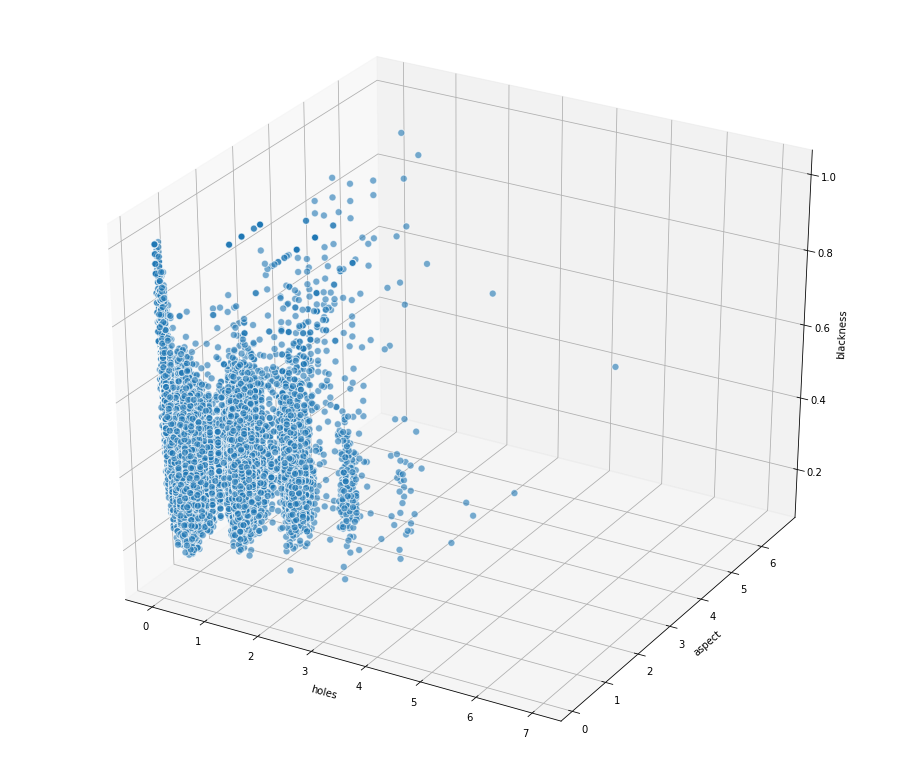

In [39]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

x = num_holes_r
y = aspect_ratio_r
z = black_ratio_r
ax.scatter(x, y, z, s=50, alpha=0.6, edgecolors='w', cmap='viridis')

ax.set_xlabel('holes')
ax.set_ylabel('aspect')
ax.set_zlabel('blackness')

Text(0.5, 0, 'blackness')

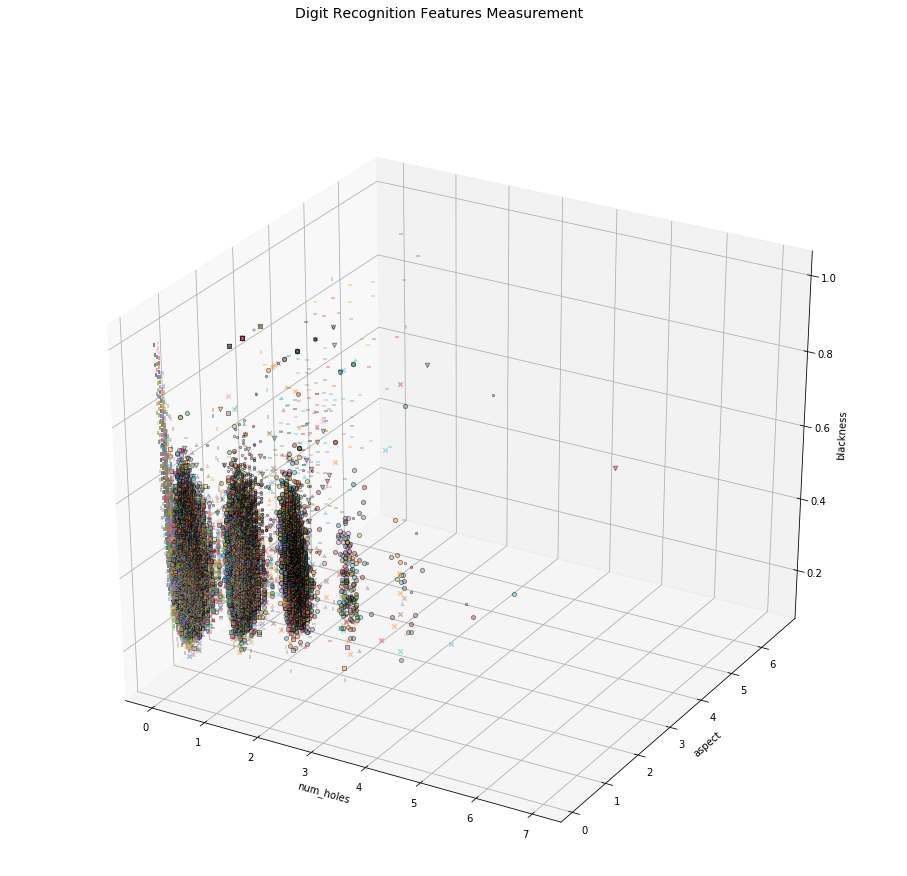

In [58]:
#visualizerion
fig = plt.figure(figsize=(16, 14))
t = fig.suptitle('Digit Recognition Features Measurement', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(num_holes_r)
ys = list(aspect_ratio_r)
zs = list(black_ratio_r)
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

#ss = list(wines['total sulfur dioxide'])
#colors = ['red' if wt == 'red' else 'yellow' for wt in enumerate(list(labels))]

markers = np.empty(60000, dtype='str')
for i,y in enumerate(labels):
    if y == 0:
        markers[i]='.'
    if y == 1: 
        markers[i]='|'
    if y== 2: 
        markers[i]='2'
    if y==3:
        markers[i]='v'
    if y==4:
        markers[i]='s'
    if y==5:
        markers[i]='_'
    if y==6:
        markers[i]='h'
    if y==7:
        markers[i]='x'
    if y==8:
        markers[i]='8'
    if y==9:
        markers[i]='x'
markers = list(markers)

for data, mark in zip(data_points, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, cmap='viridis', edgecolors='none', marker=mark)

ax.set_xlabel('num_holes')
ax.set_ylabel('aspect')
ax.set_zlabel('blackness')

In [ ]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

#### as we see from the visualization above, our features are not sufficient for adequately classify digits, so we have to find new features
#### additionally, there is a problem with numbers of holes, some digits has more than 2, which is impossible

In [59]:
a=num_holes_r[num_holes_r>2]

In [61]:

a=[i for i,y in enumerate(num_holes_r) if y > 2]    

In [63]:
len(a)

237

In [47]:
# additional set of features

def 